### Purpose

Test the WaveNet network on `pseudoGR` features. Demonstrate the difference between `categorical` loss, `ordinal` loss, and a combination.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

from coremdlr.viz import model_plots
from coremdlr.models import NetworkModel
from coremdlr.datasets import DepthSequenceGenerator, FaciesDataset


import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

Using TensorFlow backend.


In [2]:
fdset = FaciesDataset(["205-21b-3", "204-20-6a", "204-24a-6"],
                    test_wells=["204-19-6"],
                    features=["pseudoGR"],
                    label_resolution=32, 
                    pseudoGR_args={'scale_mode' : 'robust'})

fdset.load_or_generate_data()

Loading Well:  205-21b-3  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3842,)), ('top', (3842,)), ('base', (3842,)), ('pseudoGR', (3842, 32))]
Loading Well:  204-20-6a  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (3873,)), ('top', (3873,)), ('base', (3873,)), ('pseudoGR', (3873, 32))]
Loading Well:  204-24a-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (13006,)), ('top', (13006,)), ('base', (13006,)), ('pseudoGR', (13006, 32))]
Loading Well:  204-19-6  from  /home/administrator/Dropbox/core_data/facies/train_data
Feature shapes:  [('depth', (1884,)), ('top', (1884,)), ('base', (1884,)), ('pseudoGR', (1884, 32))]


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_options = ('categorical_crossentropy',
                'ordinal_squared_error',
                {'categorical_crossentropy': 0.2,
                 'ordinal_squared_error': 0.8})

wavenet_model_args = {
    'summary' : False,
    'feature' : 'pseudoGR',
    'network' : 'wavenet',
    'sequence_size' : 128,
    'network_args' : {
        'num_blocks' : 20,
        'block_filters' : 128,
        'residual_filters' : 64,
        'output_resolution' : 32,
        'dropout_rate' : 0.5,
    },
    'optimizer_args' : {
       'optimizer' : 'Adam'
    }
}

fit_args = {
    'batch_size' : 16,
    'epochs' : 15,
    'class_weighted': True
}

## Categorical Loss

In [4]:
model_args = {**wavenet_model_args, **{'loss': loss_options[0]}}

wavenet_model = NetworkModel(fdset, model_args=model_args)

In [5]:
wavenet_model.fit(fdset, **fit_args)

here 1
here 2
Shapes of `(batch_X, batch_y)`: (16, 4096), (16, 128, 4)
Epoch 1/15
20/20 [==============================] - 19s 961ms/step - loss: 1.1968 - acc: 0.3352 - val_loss: 1.1398 - val_acc: 0.1973
Epoch 2/15
20/20 [==============================] - 7s 372ms/step - loss: 1.0374 - acc: 0.3453 - val_loss: 0.8228 - val_acc: 0.5879
Epoch 3/15
20/20 [==============================] - 7s 373ms/step - loss: 0.9184 - acc: 0.4691 - val_loss: 0.8019 - val_acc: 0.5770
Epoch 4/15
20/20 [==============================] - 7s 372ms/step - loss: 0.9178 - acc: 0.4733 - val_loss: 0.8229 - val_acc: 0.5770
Epoch 5/15
20/20 [==============================] - 7s 373ms/step - loss: 0.8991 - acc: 0.4884 - val_loss: 0.8343 - val_acc: 0.5645
Epoch 6/15
20/20 [==============================] - 7s 373ms/step - loss: 0.8891 - acc: 0.4965 - val_loss: 0.8125 - val_acc: 0.5511
Epoch 7/15
20/20 [==============================] - 7s 373ms/step - loss: 0.8953 - acc: 0.4947 - val_loss: 0.8340 - val_acc: 0.5159
Epoc

0.8018899740917342

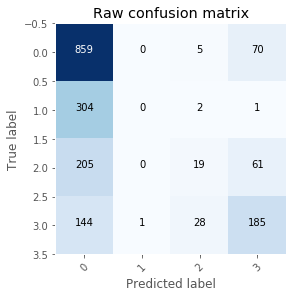

In [6]:
y_pred = wavenet_model.predict(fdset.X_test)

cm = confusion_matrix(fdset.y_test, y_pred)

model_plots.confusion_matrix_plot(cm, fdset.classes)

## Ordinal Loss

In [7]:
model_args = {**wavenet_model_args, **{'loss': loss_options[1]}}

wavenet_model = NetworkModel(fdset, model_args=model_args)

wavenet_model.fit(fdset, **fit_args)

Shapes of `(batch_X, batch_y)`: (16, 4096), (16, 128, 4)
Epoch 1/15
20/20 [==============================] - 19s 953ms/step - loss: 1.1613 - acc: 0.2291 - val_loss: 1.7885 - val_acc: 0.1540
Epoch 2/15
20/20 [==============================] - 8s 384ms/step - loss: 1.0686 - acc: 0.2636 - val_loss: 1.7885 - val_acc: 0.1540
Epoch 3/15
20/20 [==============================] - 8s 393ms/step - loss: 1.0695 - acc: 0.2621 - val_loss: 1.7885 - val_acc: 0.1540
Epoch 4/15
20/20 [==============================] - 8s 395ms/step - loss: 1.0693 - acc: 0.2620 - val_loss: 1.7885 - val_acc: 0.1540
Epoch 5/15
20/20 [==============================] - 8s 394ms/step - loss: 1.0652 - acc: 0.2643 - val_loss: 1.7885 - val_acc: 0.1540
Epoch 6/15
20/20 [==============================] - 8s 392ms/step - loss: 1.0691 - acc: 0.2623 - val_loss: 1.7885 - val_acc: 0.1540
Epoch 7/15
20/20 [==============================] - 8s 393ms/step - loss: 1.0695 - acc: 0.2626 - val_loss: 1.7885 - val_acc: 0.1540
Epoch 8/15
20/20 [

1.7885081810610635

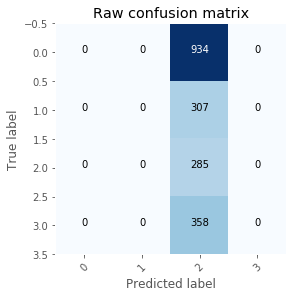

In [8]:
y_pred = wavenet_model.predict(fdset.X_test)

cm = confusion_matrix(fdset.y_test, y_pred)

model_plots.confusion_matrix_plot(cm, fdset.classes)

## Combined Loss

In [9]:
model_args = {**wavenet_model_args, **{'loss': loss_options[2]}}

wavenet_model = NetworkModel(fdset, model_args=model_args)

wavenet_model.fit(fdset, **fit_args)

here 1
here 2
Shapes of `(batch_X, batch_y)`: (16, 4096), (16, 128, 4)
Epoch 1/15
20/20 [==============================] - 20s 1s/step - loss: 1.2868 - acc: 0.2656 - val_loss: 2.7200 - val_acc: 0.1973
Epoch 2/15
20/20 [==============================] - 8s 394ms/step - loss: 0.9703 - acc: 0.2950 - val_loss: 0.7283 - val_acc: 0.4925
Epoch 3/15
20/20 [==============================] - 8s 395ms/step - loss: 0.7893 - acc: 0.4161 - val_loss: 0.8112 - val_acc: 0.5444
Epoch 4/15
20/20 [==============================] - 8s 397ms/step - loss: 0.7730 - acc: 0.4489 - val_loss: 0.7533 - val_acc: 0.5806
Epoch 5/15
20/20 [==============================] - 8s 395ms/step - loss: 0.7521 - acc: 0.4819 - val_loss: 0.7358 - val_acc: 0.5801
Epoch 6/15
20/20 [==============================] - 8s 396ms/step - loss: 0.7577 - acc: 0.4481 - val_loss: 0.8312 - val_acc: 0.5449
Epoch 7/15
20/20 [==============================] - 8s 393ms/step - loss: 0.7402 - acc: 0.4790 - val_loss: 0.7299 - val_acc: 0.5709
Epoch 8

0.7282993367740086

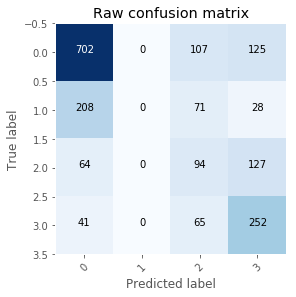

In [11]:
y_pred = wavenet_model.predict(fdset.X_test)

cm = confusion_matrix(fdset.y_test, y_pred)

model_plots.confusion_matrix_plot(cm, fdset.classes)